In [35]:
# Importando bibliotecas padrão
import joblib  # Para salvar e carregar modelos
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para criação de gráficos
import seaborn as sns  # Para visualização de dados
import warnings  # Para controlar mensagens de aviso
warnings.filterwarnings("ignore")  # Ignorar avisos de depreciação e outros

# Importando módulos de machine learning da biblioteca scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir o dataset em treino e teste
from sklearn.model_selection import GridSearchCV  # Para realizar busca em grid para otimização de hiperparâmetros
from sklearn.model_selection import cross_val_score  # Para avaliação cruzada
from sklearn.model_selection import KFold  # Para criar dobras para validação cruzada
from sklearn.metrics import ConfusionMatrixDisplay  # Para exibir a matriz de confusão de forma gráfica
from sklearn.tree import DecisionTreeClassifier  # Para classificação usando árvores de decisão
from sklearn.ensemble import RandomForestClassifier  # Para classificação usando florestas aleatórias
from sklearn.neighbors import KNeighborsClassifier  # Para classificação usando k-vizinhos mais próximos
from sklearn.linear_model import LogisticRegression  # Para regressão logística
from sklearn.svm import SVC  # Para máquinas de vetores de suporte
from sklearn.neural_network import MLPClassifier  # Para classificação usando redes neurais multicamadas
from sklearn.exceptions import ConvergenceWarning # Para controlar mensagens de aviso ConvergenceWarnings
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc)
# Importando módulo de estatística
from scipy.stats import shapiro  # Para teste de normalidade de Shapiro-Wilk
from sklearn.preprocessing import label_binarize # Para binarizar rótulos de classe
from sklearn.preprocessing import LabelEncoder # Para codificação de rótulos de classe
from scipy.stats import ks_2samp  # Para teste de Kolmogorov-Smirnov

In [36]:
# Caminho relativo a partir do diretório onde o script está localizado
df = joblib.load('data\processed\dados_processados.pkl')

In [37]:
# Selecionando as features que mais correlacionam
x = df[['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo']]
y = df['classe']
print(f"Formato das tabelas de dados {x.shape} e características dos cogumelos {y.shape}")

Formato das tabelas de dados (8124, 8) e características dos cogumelos (8124,)


In [38]:
# Separamos 20% para o teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {y_train.shape} e teste {y_test.shape}")

Formato das tabelas de dados de treino (6499,) e teste (1625,)


### Preparação dos dados

In [39]:
# Concatena os dados de 'entradas_treino' e 'entradas_teste' ao longo do eixo 0 (verticamente), formando um único array 'x_mushroom'
x_mushroom = np.concatenate((x_train, x_test), axis=0)

# Exibe as dimensões do array 'x_mushroom'
x_mushroom.shape

(8124, 8)

In [40]:
x_mushroom

array([[1, 0, 4, ..., 3, 1, 2],
       [0, 6, 6, ..., 0, 2, 2],
       [1, 3, 6, ..., 3, 1, 2],
       ...,
       [0, 0, 4, ..., 3, 1, 2],
       [1, 6, 8, ..., 4, 1, 2],
       [1, 6, 8, ..., 3, 1, 2]], shape=(8124, 8))

In [41]:
# Concatena os dados de 'categoria_treino' e 'categoria_teste' ao longo do eixo 0 (verticamente), formando um único array 'y_mushroom'
y_mushroom = np.concatenate((y_train, y_test), axis=0)

# Exibe as dimensões do array 'y_mushroom'
y_mushroom.shape

(8124,)

In [42]:
y_mushroom

array([2, 1, 1, ..., 2, 2, 2], shape=(8124,))

### Árvore de Decisão

In [43]:
parametros_decisionTree = {  # Dicionário contendo a grade de hiperparâmetros para busca
    'criterion': ['gini', 'entropy'],  # Critério para medir a qualidade da divisão (Gini ou Entropy)
    'splitter': ['best', 'random'],  # Estratégia para escolher a divisão em cada nó (Melhor ou Aleatória)
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras necessárias para estar em um nó folha
}

grid_search_decisionTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_decisionTree)  # Cria o GridSearchCV com DecisionTreeClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search_decisionTree.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search_decisionTree.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_decisionTree.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
1.0


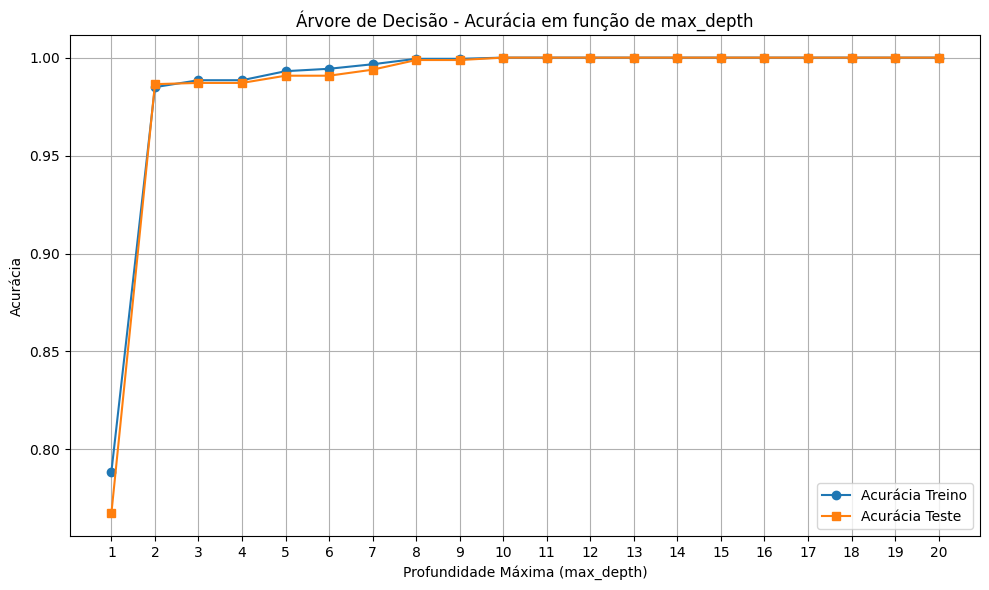

In [44]:
# Intervalo de profundidade máxima para testar
max_depth_range = list(range(1, 21))

# Listas para armazenar acurácias
train_accuracies = []
test_accuracies = []

# Treinar modelo para cada valor de max_depth
for depth in max_depth_range:
    modelo_decisionTree = DecisionTreeClassifier(
        max_depth=depth, 
        criterion='gini', 
        min_samples_leaf=1, 
        min_samples_split=2,
        splitter='best', 
        random_state=42)
    modelo_decisionTree.fit(x_train, y_train)
    train_accuracies.append(modelo_decisionTree.score(x_train, y_train))
    test_accuracies.append(modelo_decisionTree.score(x_test, y_test))

# Plotar acurácias
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(max_depth_range, test_accuracies, label='Acurácia Teste', marker='s')
plt.title('Árvore de Decisão - Acurácia em função de max_depth')
plt.xlabel('Profundidade Máxima (max_depth)')
plt.ylabel('Acurácia')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Avaliação
y_pred = modelo_decisionTree.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_tree = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_tree, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_tree:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 1.0000
🎯 Precisão: 1.0000
📈 Recall: 1.0000
🏁 F1-score: 1.0000
📊 KS (Kolmogorov-Smirnov): 1.0000

📋 Relatório de Classificação:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0    848.0
2                   1.0     1.0       1.0    777.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1625.0
weighted avg        1.0     1.0       1.0   1625.0


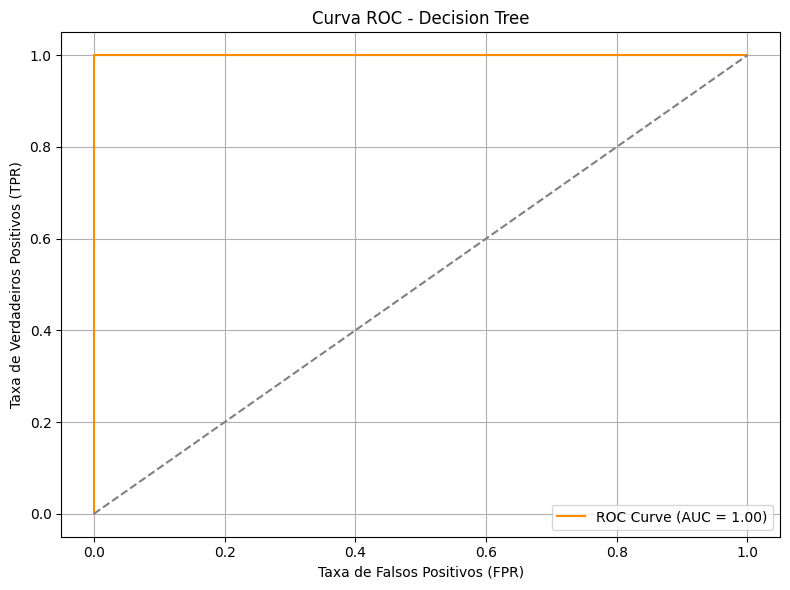

In [46]:
# Obter as probabilidades da classe positiva (classe 1)
y_pred_proba = modelo_decisionTree.predict_proba(x_test)[:, 1]

# Codificar y_test para binário (0 e 1)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Calcular FPR, TPR e thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


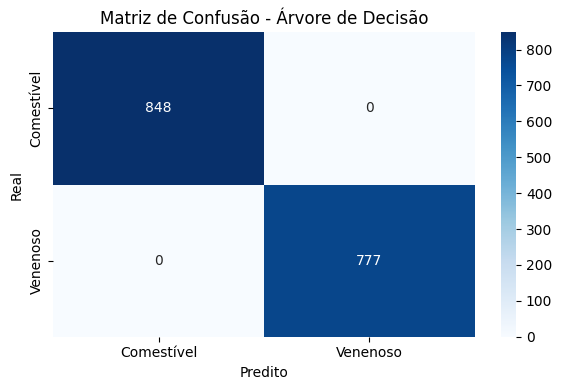

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.tight_layout()
plt.show()


### Random Forest

In [48]:
parametros_rf = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'criterion': ['gini', 'entropy'],  # Define a métrica para medir a qualidade das divisões (gini ou entropy)
    'n_estimators': [10, 40, 100, 150],  # Número de árvores na floresta do RandomForestClassifier
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras que um nó folha deve ter
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf)  # Cria o GridSearchCV com RandomForestClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search_rf.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search_rf.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_rf.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)


{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
1.0


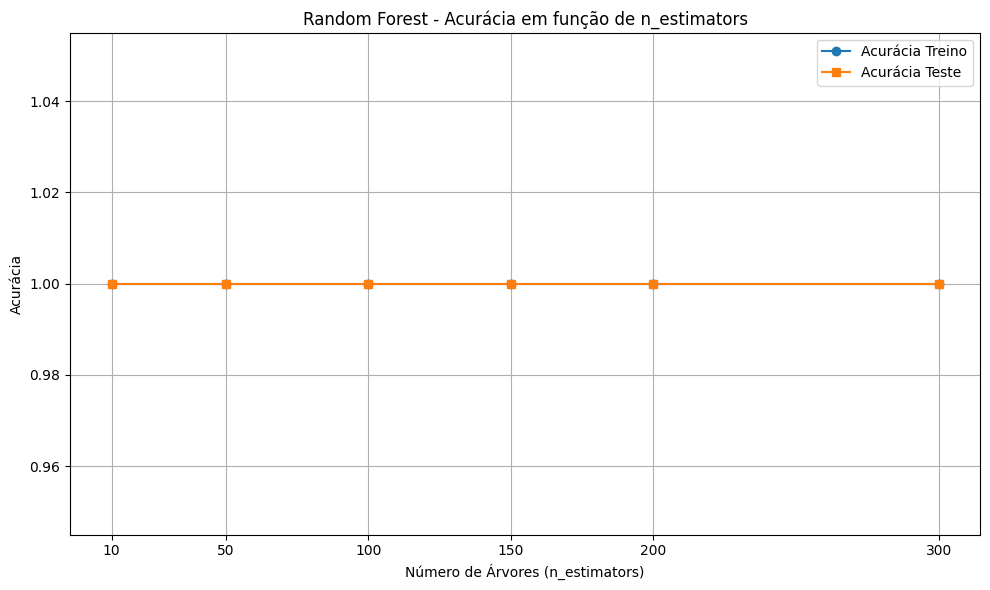

In [49]:
# Lista de quantidades de árvores a testar
n_estimators_range = [10, 50, 100, 150, 200, 300]

# Listas para armazenar as acurácias
train_accuracies = []
test_accuracies = []

# Treinar o modelo para cada n_estimators
for n in n_estimators_range:
    modelo_rf = RandomForestClassifier(
        n_estimators=n, 
        criterion='gini', 
        min_samples_leaf=1, 
        min_samples_split=2, 
        random_state=42)
    modelo_rf.fit(x_train, y_train)
    train_accuracies.append(modelo_rf.score(x_train, y_train))
    test_accuracies.append(modelo_rf.score(x_test, y_test))

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Acurácia Teste', marker='s')
plt.title('Random Forest - Acurácia em função de n_estimators')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia')
plt.xticks(n_estimators_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Avaliação
y_pred = modelo_rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_rf, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_rf:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 1.0000
🎯 Precisão: 1.0000
📈 Recall: 1.0000
🏁 F1-score: 1.0000
📊 KS (Kolmogorov-Smirnov): 1.0000

📋 Relatório de Classificação:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0    848.0
2                   1.0     1.0       1.0    777.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1625.0
weighted avg        1.0     1.0       1.0   1625.0


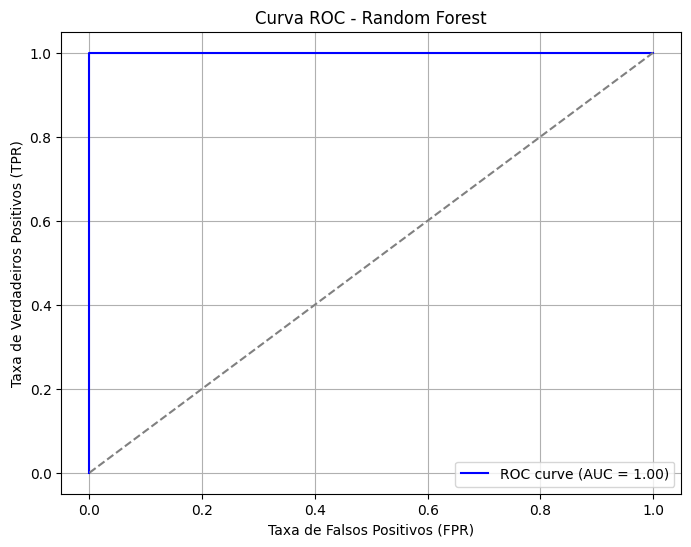

In [51]:
# Codifica as classes para 0 e 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Obtém probabilidades da classe 1 (venenoso, por exemplo)
y_pred_proba = modelo_rf.predict_proba(x_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)


# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

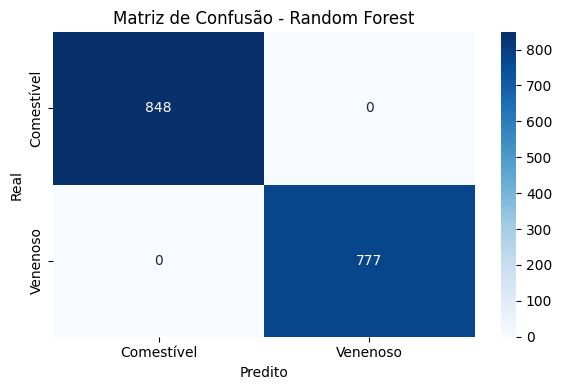

In [52]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()

### KNN

In [53]:
parametros_knn = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'n_neighbors': [3, 5, 10, 20],  # Número de vizinhos a serem usados pelo algoritmo K-Nearest Neighbors (KNN)
    'p': [1, 2]  # Parâmetro da métrica de distância: 1 para Manhattan (L1), 2 para Euclidiana (L2)
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)  # Cria o GridSearchCV com KNeighborsClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search_knn.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search_knn.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_knn.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'n_neighbors': 3, 'p': 1}
0.9997538461538461


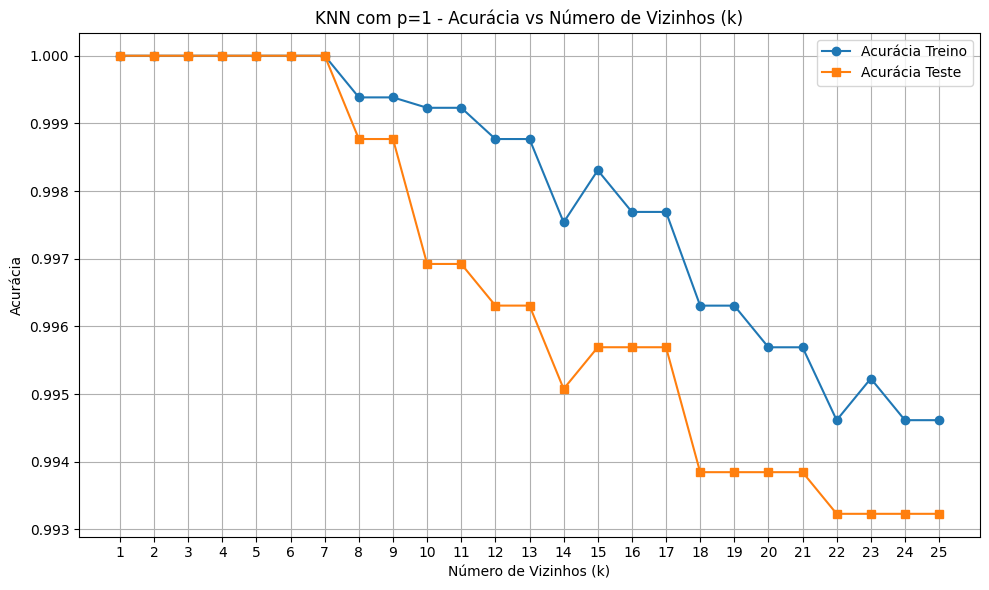

In [54]:
# Intervalo de k (n_neighbors) a testar
k_range = list(range(1, 26))

# Listas para armazenar acurácias
train_accuracies = []
test_accuracies = []

# Treinar o modelo KNN variando k, com p fixo em 1 (distância de Manhattan)
for k in k_range:
    modelo_knn = KNeighborsClassifier(n_neighbors=k, p=1)
    modelo_knn.fit(x_train, y_train)
    train_accuracies.append(modelo_knn.score(x_train, y_train))
    test_accuracies.append(modelo_knn.score(x_test, y_test))

# Plotar acurácias de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(k_range, test_accuracies, label='Acurácia Teste', marker='s')
plt.title('KNN com p=1 - Acurácia vs Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
# Avaliação
y_pred = modelo_knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_knn, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_knn:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 0.9932
🎯 Precisão: 0.9936
📈 Recall: 0.9929
🏁 F1-score: 0.9932
📊 KS (Kolmogorov-Smirnov): 0.9858

📋 Relatório de Classificação:
              precision    recall  f1-score      support
1              0.987194  1.000000  0.993556   848.000000
2              1.000000  0.985843  0.992871   777.000000
accuracy       0.993231  0.993231  0.993231     0.993231
macro avg      0.993597  0.992921  0.993213  1625.000000
weighted avg   0.993317  0.993231  0.993228  1625.000000


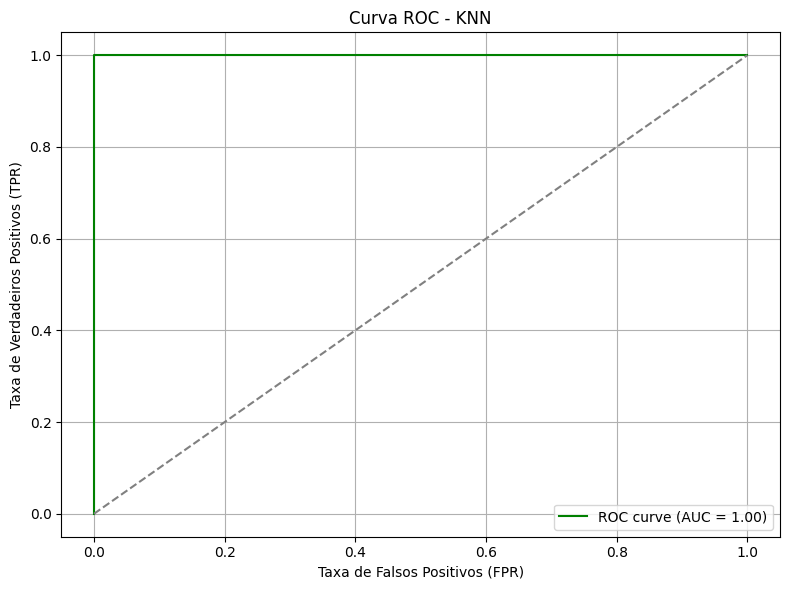

In [56]:
# Ajustar o melhor modelo KNN encontrado pelo GridSearch
modelo_knn = grid_search_knn.best_estimator_
modelo_knn.fit(x_train, y_train)

# Codifica as classes do y_test para 0 e 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Obtém as probabilidades da classe positiva (classe 1)
y_pred_proba = modelo_knn.predict_proba(x_test)[:, 1]

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

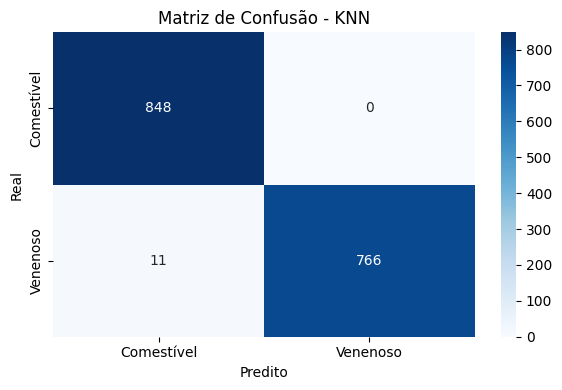

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - KNN")
plt.tight_layout()
plt.show()

### Regressão Logística

In [58]:
parametros_logistic = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.0001, 0.00001, 0.000001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [1.0, 1.5, 2.0],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'solver': ['lbfgs', 'sag', 'saga'],  # Algoritmo de otimização a ser usado na resolução do problema de ajuste do modelo
    'max_iter': [500, 1000]  # Aumentar o número de iterações para permitir a convergência
}

In [59]:
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_logistic)  # Cria o GridSearchCV com LogisticRegression como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search_logistic.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search_logistic.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_logistic.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'C': 1.0, 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.0001}
0.8764147025388406


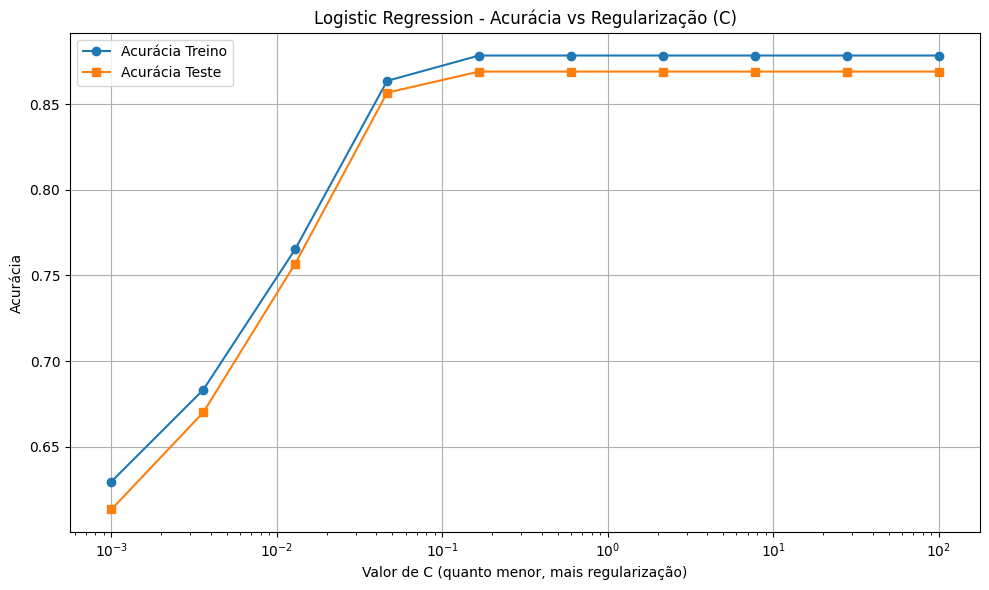

In [60]:
# Valores de C a testar (controle da regularização)
c_values = np.logspace(-3, 2, 10)  # De 0.001 a 100

# Listas para armazenar acurácias
train_accuracies = []
test_accuracies = []

# Treinar o modelo para cada valor de C, com os demais hiperparâmetros fixos
for c in c_values:
    modelo_logistic = LogisticRegression(
        C=c,
        solver='lbfgs',
        tol=0.0001,
        max_iter=500,
        random_state=42
    )
    modelo_logistic.fit(x_train, y_train)
    train_accuracies.append(modelo_logistic.score(x_train, y_train))
    test_accuracies.append(modelo_logistic.score(x_test, y_test))

# Plotar acurácias de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(c_values, test_accuracies, label='Acurácia Teste', marker='s')
plt.xscale('log')
plt.title('Logistic Regression - Acurácia vs Regularização (C)')
plt.xlabel('Valor de C (quanto menor, mais regularização)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# Avaliação
y_pred = modelo_logistic.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_logistic = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_logistic, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_logistic:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 0.8689
🎯 Precisão: 0.8699
📈 Recall: 0.8703
🏁 F1-score: 0.8689
📊 KS (Kolmogorov-Smirnov): 0.7405

📋 Relatório de Classificação:
              precision    recall  f1-score      support
1              0.902408  0.839623  0.869884   848.000000
2              0.837321  0.900901  0.867948   777.000000
accuracy       0.868923  0.868923  0.868923     0.868923
macro avg      0.869864  0.870262  0.868916  1625.000000
weighted avg   0.871286  0.868923  0.868958  1625.000000


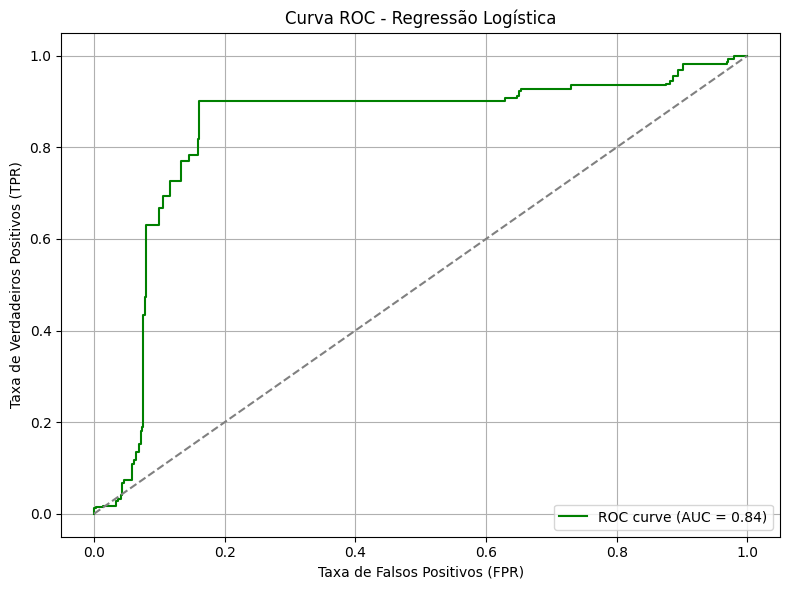

In [62]:
# Ajustar o melhor modelo de Regressão Logística encontrado pelo GridSearch
modelo_logistic = grid_search_logistic.best_estimator_
modelo_logistic.fit(x_train, y_train)

# Codifica as classes do y_test para 0 e 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Obtém as probabilidades da classe positiva (classe 1)
y_pred_proba = modelo_logistic.predict_proba(x_test)[:, 1]

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Regressão Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


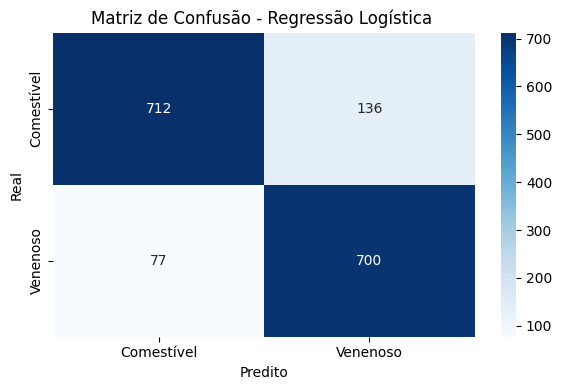

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística ")
plt.tight_layout()
plt.show()

### SVM

In [64]:
parametros_svm = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.001, 0.0001, 0.00001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [0.1, 0.5, 1],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Tipo de função kernel a ser usada pelo SVM
}

In [65]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)  # Cria o GridSearchCV com SVC como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search_svm.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search_svm.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_svm.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)


{'C': 1, 'kernel': 'rbf', 'tol': 0.001}
0.9838748010610079


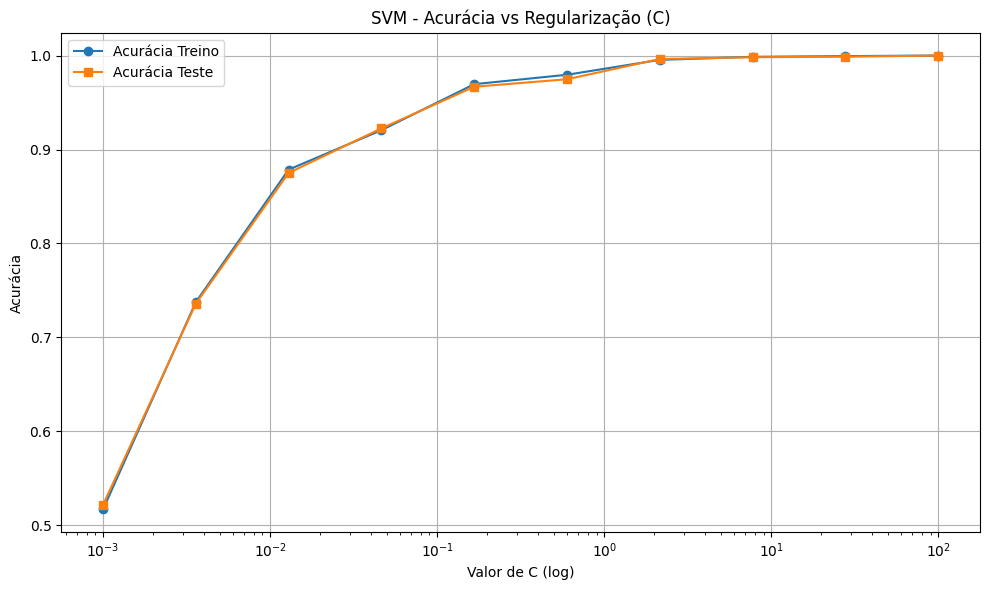

In [66]:
# Valores de C a testar (em escala logarítmica)
c_values = np.logspace(-3, 2, 10)  # De 0.001 até 100

# Listas para armazenar as acurácias
train_accuracies = []
test_accuracies = []

# Treinar o modelo para cada valor de C, fixando kernel e tol
for c in c_values:
    modelo_svm = SVC(
        C=c, 
        kernel='rbf', 
        tol=0.001, 
        probability=True, 
        random_state=42)
    modelo_svm.fit(x_train, y_train)

    # Acurácia no conjunto de treino e teste
    train_acc = accuracy_score(y_train, modelo_svm.predict(x_train))
    test_acc = accuracy_score(y_test, modelo_svm.predict(x_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotar acurácia de treino vs teste
plt.figure(figsize=(10, 6))
plt.semilogx(c_values, train_accuracies, label='Acurácia Treino', marker='o')
plt.semilogx(c_values, test_accuracies, label='Acurácia Teste', marker='s')
plt.title('SVM - Acurácia vs Regularização (C)')
plt.xlabel('Valor de C (log)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
# Avaliação
y_pred = modelo_svm.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_svm, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_svm:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 1.0000
🎯 Precisão: 1.0000
📈 Recall: 1.0000
🏁 F1-score: 1.0000
📊 KS (Kolmogorov-Smirnov): 1.0000

📋 Relatório de Classificação:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0    848.0
2                   1.0     1.0       1.0    777.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1625.0
weighted avg        1.0     1.0       1.0   1625.0


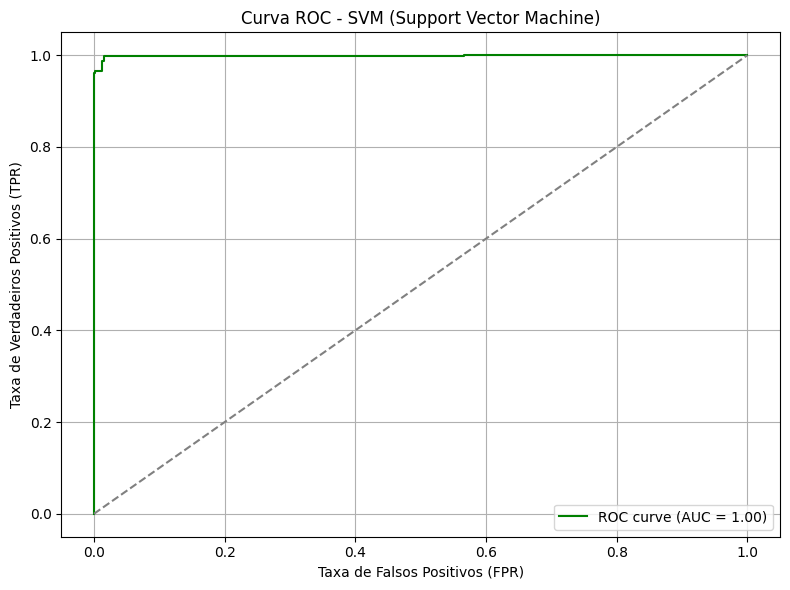

In [68]:
# Ajustar o melhor modelo SVM encontrado pelo GridSearch
modelo_svm = grid_search_svm.best_estimator_

# Verifica se o modelo tem probability=True, senão treina novamente com essa opção
if not hasattr(modelo_svm, "predict_proba"):
    # Recriar o modelo com os melhores parâmetros e probability=True
    modelo_svm = SVC(C=modelo_svm.C, kernel=modelo_svm.kernel, tol=modelo_svm.tol, probability=True)
    modelo_svm.fit(x_train, y_train)

# Codifica as classes do y_test para 0 e 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Obtém as probabilidades da classe positiva (classe 1)
y_pred_proba = modelo_svm.predict_proba(x_test)[:, 1]

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - SVM (Support Vector Machine)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


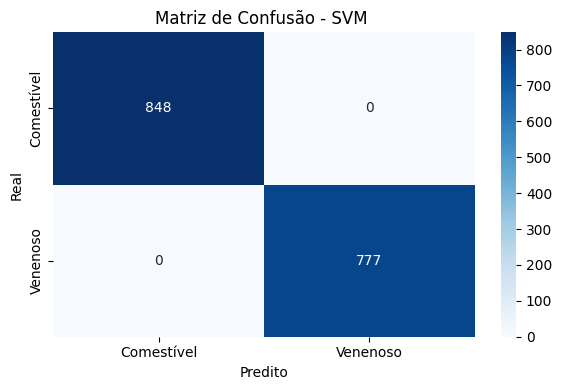

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM ")
plt.tight_layout()
plt.show()

### Redes Neurais - MLP

In [70]:
parametros_mlp = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'activation': ['relu', 'logistic', 'tanh'],  # Função de ativação a ser usada nas camadas ocultas ('relu', 'logistic', 'tanh')
    'solver': ['adam', 'sgd'],  # Algoritmo para otimização do modelo ('adam', 'sgd')
    'batch_size': [10, 560],  # Tamanho do lote para atualização dos gradientes
    'max_iter': [500, 1000]  # Aumentando o número de iterações para garantir a convergência
}

In [71]:
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros_mlp)  # Cria o GridSearchCV com MLPClassifier e a grade de hiperparâmetros
grid_search_mlp.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search_mlp aos dados de treinamento, realizando a busca exaustiva de hiperparâmetros
melhores_parametros = grid_search_mlp.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search_mlp.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'activation': 'tanh', 'batch_size': 10, 'max_iter': 500, 'solver': 'adam'}
1.0


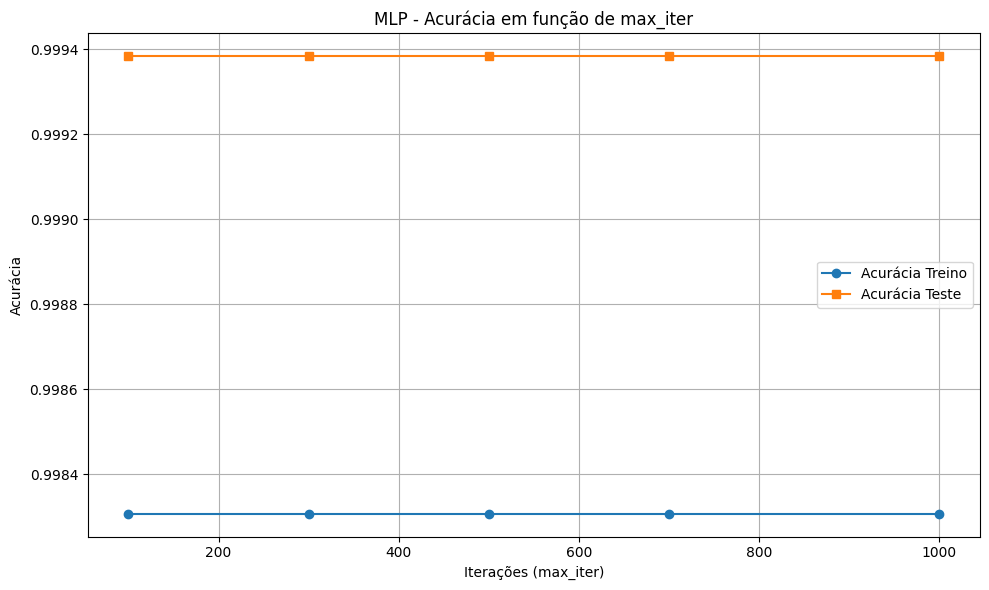

In [72]:
# Acurácia de treino e teste para visualizar overfitting
iter_range = [100, 300, 500, 700, 1000]
train_accuracies = []
test_accuracies = []

for i in iter_range:
    model_mlp = MLPClassifier(activation='relu', solver='adam', batch_size=10, max_iter=i, random_state=42)
    model_mlp.fit(x_train, y_train)
    train_accuracies.append(model_mlp.score(x_train, y_train))
    test_accuracies.append(model_mlp.score(x_test, y_test))

# Gráfico de overfitting
plt.figure(figsize=(10, 6))
plt.plot(iter_range, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(iter_range, test_accuracies, label='Acurácia Teste', marker='s')
plt.title('MLP - Acurácia em função de max_iter')
plt.xlabel('Iterações (max_iter)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# Avaliação
y_pred = grid_search_mlp.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix_mlp = confusion_matrix(y_test, y_pred)

# Calcular KS
ks_statistic_mlp, _ = ks_2samp(
    y_pred[y_test == 1],
    y_pred[y_test == 2]
)

# Exibir métricas
print(f"🔍 Acurácia: {acc:.4f}")
print(f"🎯 Precisão: {prec:.4f}")
print(f"📈 Recall: {rec:.4f}")
print(f"🏁 F1-score: {f1:.4f}")
print(f"📊 KS (Kolmogorov-Smirnov): {ks_statistic_mlp:.4f}")

# Exibir relatório completo
relatorio_df = pd.DataFrame(report).transpose()
print("\n📋 Relatório de Classificação:")
print(relatorio_df)

🔍 Acurácia: 1.0000
🎯 Precisão: 1.0000
📈 Recall: 1.0000
🏁 F1-score: 1.0000
📊 KS (Kolmogorov-Smirnov): 1.0000

📋 Relatório de Classificação:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0    848.0
2                   1.0     1.0       1.0    777.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1625.0
weighted avg        1.0     1.0       1.0   1625.0


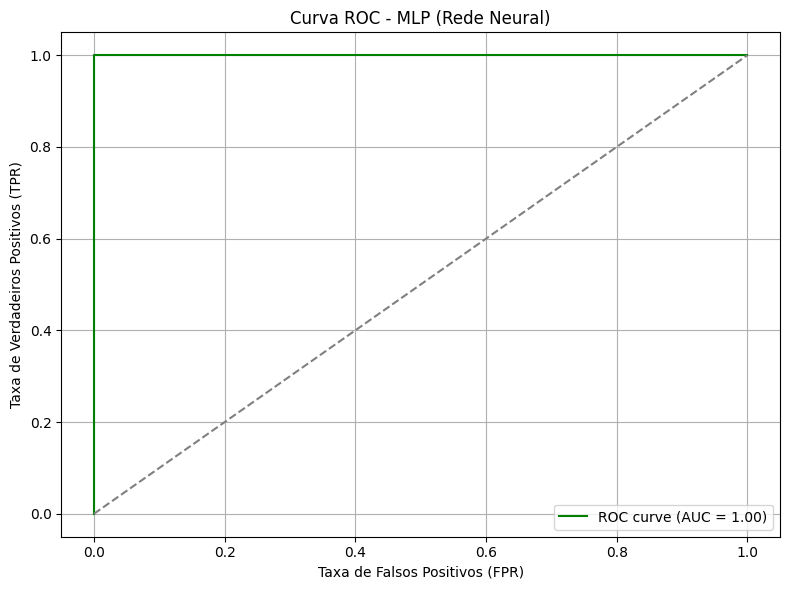

In [74]:
# Ajustar o melhor modelo MLP encontrado pelo GridSearch
modelo_mlp = grid_search_mlp.best_estimator_
modelo_mlp.fit(x_train, y_train)

# Codifica as classes do y_test para 0 e 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Obtém as probabilidades da classe positiva (classe 1)
y_pred_proba = modelo_mlp.predict_proba(x_test)[:, 1]

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - MLP (Rede Neural)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

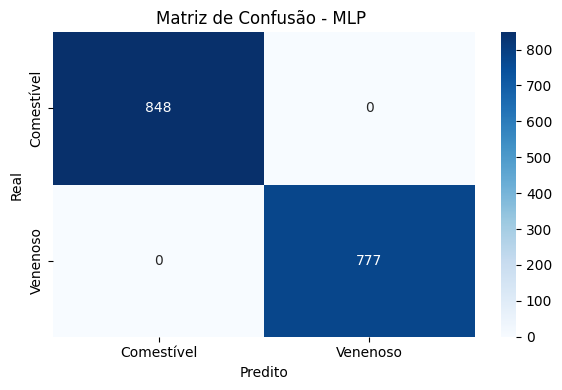

In [75]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Comestível", "Venenoso"],
            yticklabels=["Comestível", "Venenoso"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - MLP ")
plt.tight_layout()
plt.show()

### Validação Cruzada

In [76]:
# Inicialização de listas para armazenar os resultados das avaliações dos modelos
resultados_arvore = []  # Lista para armazenar os resultados da Árvore de Decisão
resultados_random_forest = []  # Lista para armazenar os resultados do Random Forest
resultados_knn = []  # Lista para armazenar os resultados do KNN
resultados_logistica = []  # Lista para armazenar os resultados da Regressão Logística
resultados_svm = []  # Lista para armazenar os resultados do SVM
resultados_rede_neural = []  # Lista para armazenar os resultados da Rede Neural

# Loop para realizar a validação cruzada 30 vezes com diferentes seeds
for i in range(30):
    print(i)  # Imprime o número da iteração atual

    # Criação do KFold com 10 divisões, embaralhando os dados e utilizando uma seed diferente a cada iteração
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)  # Cria uma instância do KFold para a validação cruzada

    # Avaliação da Árvore de Decisão
    arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2,splitter='best', random_state=42)  # Define o modelo de Árvore de Decisão com hiperparâmetros ajustados
    scores = cross_val_score(arvore, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_arvore.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do Random Forest
    random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, n_estimators=10)  # Define o modelo Random Forest com hiperparâmetros ajustados
    scores = cross_val_score(random_forest, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_random_forest.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do KNN
    knn = KNeighborsClassifier(n_neighbors=3, p=1)  # Define o modelo KNN com hiperparâmetros ajustados
    scores = cross_val_score(knn, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_knn.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Regressão Logística
    logistica = LogisticRegression(C=1.0, max_iter=500, solver='lbfgs', tol=0.0001)  # Define o modelo de Regressão Logística com hiperparâmetros ajustados
    scores = cross_val_score(logistica, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_logistica.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do SVM
    svm = SVC(C=1, kernel='rbf', tol=0.001)  # Define o modelo SVM com hiperparâmetros ajustados
    scores = cross_val_score(svm, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_svm.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Rede Neural (ajuste manual, resultados esperados a serem incluídos)
    rede_neural = MLPClassifier(activation='relu', solver='adam', batch_size=10, max_iter=max(1, i), random_state=42)  # Define o modelo de Rede Neural com hiperparâmetros ajustados
    scores = cross_val_score(rede_neural, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_rede_neural.append(scores.mean())  # Calcula e armazena a média das acurácias

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


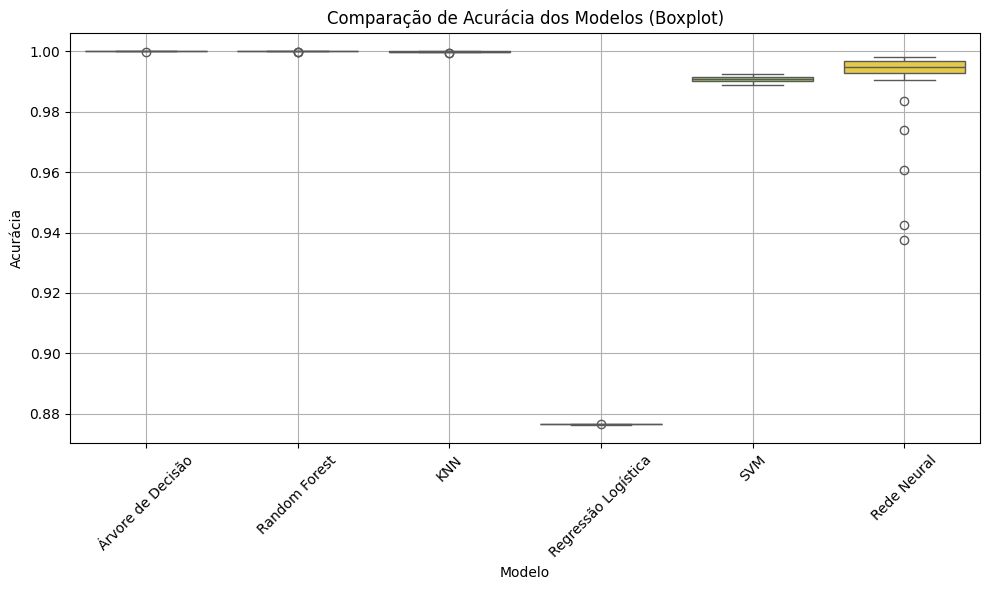

In [77]:
# Criando o dicionário com os resultados reais das 30 execuções
dados_reais = {
    "Árvore de Decisão": resultados_arvore,
    "Random Forest": resultados_random_forest,
    "KNN": resultados_knn,
    "Regressão Logística": resultados_logistica,
    "SVM": resultados_svm,
    "Rede Neural": resultados_rede_neural,
}

# Convertendo para DataFrame longo
df_resultados_reais = pd.DataFrame(dados_reais)
df_resultados_long = df_resultados_reais.melt(var_name="Modelo", value_name="Acurácia")

# Plotando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resultados_long, x="Modelo", y="Acurácia", palette="Set2")
plt.title("Comparação de Acurácia dos Modelos (Boxplot)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
# Estatísticas de média e desvio padrão
estatisticas = df_resultados_reais.agg(["mean", "std"]).T.reset_index()
estatisticas.columns = ["Modelo", "Média", "Desvio Padrão"]

import numpy as np
estatisticas["Média"] = estatisticas["Média"].round(3)
estatisticas["Desvio Padrão"] = estatisticas["Desvio Padrão"].round(5)

estatisticas.sort_values("Média", ascending=False, inplace=True)
estatisticas.reset_index(drop=True, inplace=True)

estatisticas


,Modelo,Média,Desvio Padrão
0,Árvore de Decisão,1.000,0.00004
1,Random Forest,1.000,0.00008
2,KNN,1.000,0.00014
3,SVM,0.991,0.00089
4,Rede Neural,0.989,0.01551
5,Regressão Logística,0.876,0.00000


In [79]:
# Exibição do DataFrame contendo os resultados
df_resultados_reais  # Exibe o DataFrame na saída, mostrando a média das acurácias para cada modelo em cada iteração

,Árvore de Decisão,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
0,1.000000,1.000000,0.999877,0.876416,0.991755,0.937469
1,1.000000,1.000000,1.000000,0.876417,0.991631,0.942394
2,1.000000,1.000000,0.999877,0.876411,0.991628,0.960606
3,1.000000,1.000000,0.999877,0.876414,0.991136,0.974152
4,1.000000,1.000000,0.999877,0.876415,0.991136,0.983750
5,1.000000,1.000000,0.999754,0.876413,0.990769,0.992122
6,1.000000,1.000000,1.000000,0.876420,0.990646,0.990524
7,1.000000,1.000000,0.999754,0.876416,0.990152,0.992615
8,1.000000,1.000000,1.000000,0.876415,0.991382,0.993230
9,1.000000,1.000000,0.999877,0.876419,0.991753,0.994092


In [80]:
df_resultados_reais.describe()

,Árvore de Decisão,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.999992,0.999975,0.999873,0.876415,0.990871,0.989365
std,0.000045,0.000075,0.000135,0.000002,0.000887,0.015512
min,0.999754,0.999754,0.999385,0.876411,0.989044,0.937469
25%,1.000000,1.000000,0.999877,0.876414,0.990307,0.992769
50%,1.000000,1.000000,0.999877,0.876415,0.991014,0.994953
75%,1.000000,1.000000,1.000000,0.876416,0.991385,0.996769
max,1.000000,1.000000,1.000000,0.876420,0.992490,0.998277


In [81]:
# Calcula e exibe a variância dos resultados das validações cruzadas para cada modelo
# Baixa variância indica desempenho consistente e previsível do modelo, com variações mínimas nas acurácias entre as iterações.
# Alta variância sugere sensibilidade a pequenas mudanças nos dados ou hiperparâmetros, levando a um desempenho menos estável e mais variável durante as iterações da validação cruzada.
df_resultados_reais.var()

Árvore de Decisão      2.017240e-09
Random Forest          5.643619e-09
KNN                    1.826577e-08
Regressão Logística    3.624966e-12
SVM                    7.861655e-07
Rede Neural            2.406271e-04
dtype: float64

In [82]:
# Calcula e exibe o Coeficiente de Variação (CV) dos resultados das validações cruzadas para cada modelo, em percentual
(df_resultados_reais.std() / df_resultados_reais.mean()) * 100

Árvore de Decisão      0.004491
Random Forest          0.007513
KNN                    0.013517
Regressão Logística    0.000217
SVM                    0.089483
Rede Neural            1.567891
dtype: float64

#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

- Forma do Caule (1 = t): Afunilando – o caule se afunila à medida que cresce.

- Raiz do Caule (4 = r): Enraizado – base do caule está fortemente enraizada.

- Odor (2 = l): Anis – odor semelhante a anis.

- Habitat (4 = u): Urbano – encontrado em áreas urbanas.

- Cor do Chapéu (1 = b): Creme – chapéu de cor creme.

- Forma do Chapéu (1 = c): Cônico – chapéu com formato cônico.

- Número do Anel (3 = t): Dois – possui dois anéis no caule.

- Cor do Velo (2 = w): Branco – cor do velo é branca.

In [83]:
# Teste 1
Test = pd.DataFrame([[1, 4, 2, 4, 1, 1, 3, 2]], columns=['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo'])
previsao = modelo_rf.predict(Test)
print("Previsão:", previsao)

Previsão: [1]


#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

- Forma do Caule (0 = e): Alargando – o caule se alarga à medida que cresce.

- Raiz do Caule (0 = b): Bulbosa – base do caule em formato de bulbo.

- Odor (5 = m): Mofado – odor de mofo.

- Habitat (4 = u): Urbano – encontrado em áreas urbanas.

- Cor do Chapéu (4 = e): Verde – chapéu esverdeado.

- Forma do Chapéu (0 = b): Sino – chapéu em forma de sino.

- Número do Anel (0 = n): Nenhum – sem anéis no caule.

- Cor do Velo (1 = o): Laranja – cor do velo é laranja.

In [84]:
# Teste 2
Test = pd.DataFrame([[0, 0, 5, 4, 4, 0, 0, 1]], columns=['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo'])
previsao = modelo_rf.predict(Test)
print("Previsão:", previsao)

Previsão: [2]


In [85]:
# Salva o modelo treinado
joblib.dump(modelo_rf, 'modelo_rf.pkl')

['modelo_rf.pkl']